<a href="https://colab.research.google.com/github/NikkyXO/DAS_projects/blob/main/first_projects/03_Project_Acquire_and_Prepare_Data_from_Web.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - Acquire and Prepare Data from Web

![Data Science Workflow](img/ds-workflow.png)

## Goal of Project
- This project will focus on Step 1 and 2 (**Acquire** and **Prepare**)
- We will read raw data that needs Data Wrangling to prepare
- The process we follow demonstrates how a Data Scientist works

## Step 1: Acquire
- Explore problem
- Identify data
- Import data

### Step 1.a: Import libraries
- Execute the cell below (SHIFT + ENTER)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Step 1.b: Retrieve/Read the data
- There are two options to get data
#### Option 1: Directly from wikipedia
- Assign variable ```url = "https://en.wikipedia.org/wiki/Wikipedia:Fundraising_statistics"```
- Retrieve the data ```tables = pd.read_html(url)```
- Assign the first DataFrame to a variable
    - HINT: ```tables``` is a list DataFrame containing all the data

#### Option 2: From csv file (if option 1 fails)
- Use ```pd.read_csv()``` to read the file `files/fundraising.csv`
- NOTE: Remember to assign the result to a variable (e.g., ```data```)
- Apply ```.head()``` on the data to see all is as expected

In [28]:
url = "https://en.wikipedia.org/wiki/Wikipedia:Fundraising_statistics"

In [29]:
tables = pd.read_html(url)
type(tables)

list

In [5]:
type(tables[0])

pandas.core.frame.DataFrame

In [22]:
tables[0].head(2)

,Year,Source,Revenue,Expenses,Asset rise,Total assets
0,2021/22,PDF,"$ 154,686,521","$ 145,970,915","$ 8,173,996","$ 239,351,532"
1,2020/21,PDF,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536"


## Step 2: Prepare
- Explore data
- Visualize ideas
- Cleaning data

### Step 2.a: Check the data types
- This step tells you if some numeric column is not represented numeric.
- Get the data types by ```.dtypes```

In [7]:
tables[0].dtypes

Year            object
Source          object
Revenue         object
Expenses        object
Asset rise      object
Total assets    object
dtype: object

### Step 2.b: Check for null (missing) values
- Data often is missing entries - there can be many reasons for this
- We need to deal with that (will do later in course)
- Use ```.isna().any()```

In [9]:
tables[0].isna().any().any()

False

### Step 2.c: Delete Source Column
- The Column Source adds no value for further investigations
- You can delete it by
    - ```del data['Source']```

In [30]:
data = tables[0]
data.shape

(19, 6)

In [31]:
del data['Source']
data.shape

(19, 5)

In [13]:
data.head(2)

,Year,Revenue,Expenses,Asset rise,Total assets
0,2021/22,"$ 154,686,521","$ 145,970,915","$ 8,173,996","$ 239,351,532"
1,2020/21,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536"


### Step 2.d: Convert Year column to numeric
- All the strings in years are formatted: 'YYYY/YYYY'
- To get the last year as string: ```data['Year'].str[-4:]```
- To convert that to numeric use: ```pd.to_numeric(...)```
    - HINT: You can assign the column directly

In [32]:
data['Year'] = pd.to_numeric(data['Year'].str[:4], errors="coerce")
data.head(3)

,Year,Revenue,Expenses,Asset rise,Total assets
0,2021,"$ 154,686,521","$ 145,970,915","$ 8,173,996","$ 239,351,532"
1,2020,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536"
2,2019,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725"


### Step 2.e: Set Year to index
- To change a column to be the index use: ```data.set_index('Year', inplace=True)```
- Also sort the index in correct order: ```data.sort_index(inplace=True)```

In [33]:
data.set_index('Year', inplace=True)
data.head(2)

,Revenue,Expenses,Asset rise,Total assets
Year,,,,
2021,"$ 154,686,521","$ 145,970,915","$ 8,173,996","$ 239,351,532"
2020,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536"


In [34]:
data.sort_index(inplace=True)
data.head(2)

,Revenue,Expenses,Asset rise,Total assets
Year,,,,
2003,"$ 80,129","$ 23,463","$ 56,666","$ 56,666"
2004,"$ 379,088","$ 177,670","$ 211,418","$ 268,084"


### Step 2.f: Convert the remaining columns to numeric
- Remember the steps from the lesson
    - ```.str[2:]``` to remove the first two characters ('\$ ')
    - ```.str.replace(',', '')``` to remove commas
    - ```pd.to_numeric(...)``` converts string (containing well-formed number) to the numeric value
- Try to do it directly column by column

In [35]:
# Revenue


In [38]:
data["Rev"] = pd.to_numeric(data["Revenue"].str[2:].str.replace(",", ""), errors="coerce")

In [39]:
data.head(2)
data.dtypes


Revenue         object
Expenses        object
Asset rise      object
Total assets    object
Rev              int64
dtype: object

In [40]:
# Expenses
data["Exp"] = pd.to_numeric(data["Expenses"].str[2:].str.replace(",", ""), errors="coerce")
data.head(2)

,Revenue,Expenses,Asset rise,Total assets,Rev,Exp
Year,,,,,,
2003,"$ 80,129","$ 23,463","$ 56,666","$ 56,666",80129,23463
2004,"$ 379,088","$ 177,670","$ 211,418","$ 268,084",379088,177670


In [42]:
# Total Assests

data["Total assets"] = pd.to_numeric(data["Total assets"].str[2:].str.replace(",", ""), errors="coerce")
data.head(2)

,Revenue,Expenses,Asset rise,Total assets,Rev,Exp
Year,,,,,,
2003,"$ 80,129","$ 23,463","$ 56,666",56666,80129,23463
2004,"$ 379,088","$ 177,670","$ 211,418",268084,379088,177670


In [44]:
# Total Assests
data["Asset rise"] = data["Asset rise"].str[2:].str.replace(",", "")
data["Asset rise"] = pd.to_numeric(data["Asset rise"], errors="coerce")
data.head(2)

,Revenue,Expenses,Asset rise,Total assets,Rev,Exp
Year,,,,,,
2003,"$ 80,129","$ 23,463",56666,56666,80129,23463
2004,"$ 379,088","$ 177,670",211418,268084,379088,177670


In [41]:
data.dtypes

Revenue         object
Expenses        object
Asset rise      object
Total assets    object
Rev              int64
Exp              int64
dtype: object

### Step 2.g: Visualize data to investigate quality
- Make a simple plot of **Revenue**, **Expenses** and **Total assets**
- This will help you spot any outliers

<Axes: xlabel='Year'>

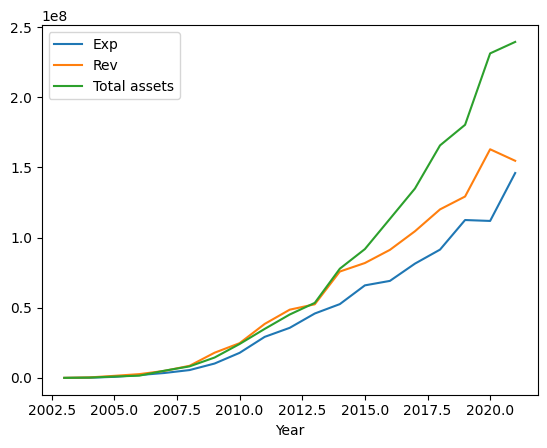

In [45]:
data[["Exp", "Rev", "Total assets"]].plot()

### Step 2.h: Visualize data to investigate quality
- Make a simple plot of **Asset rise**
- This will help you spot any outliers

<Axes: xlabel='Year'>

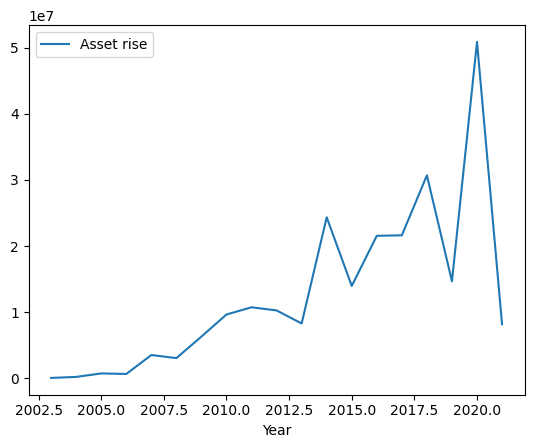

In [46]:
data[["Asset rise"]].plot()